In [1]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Mount the drive and move the specific folder path
drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/")
os.listdir()

In [4]:
df = pd.read_csv("bh_data.txt",delimiter=',')
df.columns=['Date', 'Transactions']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2019-06-29', '2019-06-30', '2019-01-07', '2019-02-07',
               '2019-03-07', '2019-04-07', '2019-05-07', '2019-06-07',
               '2019-07-07', '2019-08-07'],
              dtype='datetime64[ns]', name='Date', length=1285, freq=None)

In [5]:
ts = df['2016-01-01':'2018-12-31'].resample('M').sum()
ts.tail()

,Transactions
Date,
2018-08-31,69479800
2018-09-30,67675150
2018-10-31,71196900
2018-11-30,81078151
2018-12-31,173976486


In [ ]:
!pip install pmdarima

In [7]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to gift card transaction dataset 
stepwise_fit = auto_arima(ts['Transactions'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=778.058, Time=0.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=789.686, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=773.766, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=776.793, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=788.997, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=772.101, Time=0.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=774.101, Time=0.91 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=772.241, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=771.429, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=762.392, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=770.742, Time=0.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=773.708, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=772.614, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=775.332, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -379.196
Date:                            Sun, 31 Jan 2021   AIC                            762.392
Time:                                    17:15:35   BIC                            764.663
Sample:                                         0   HQIC                           762.963
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1864      0.032      5.753      0.000       0.123       0.250
sigma2      1.371e+13   1.07e-16   1.29e+29      0.000    1.37e+13    1.37e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 8.16
Prob(Q):                              0.33   Prob(JB):                         0.02
Heteroskedasticity (H):              16.69   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.32e+44. Standard errors may be unstable.
"""

In [8]:
# Fit a SARIMAX(0, 1, 0)x(1, 1, 0, 12) on the training set 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(ts['Transactions'],  
                order = (0, 1, 0),  
                seasonal_order =(1, 1, 0, 12)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Transactions   No. Observations:                   36
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -379.196
Date:                            Sun, 31 Jan 2021   AIC                            762.392
Time:                                    17:15:41   BIC                            764.663
Sample:                                01-31-2016   HQIC                           762.963
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1864      0.032      5.753      0.000       0.123       0.250
sigma2      1.371e+13   1.07e-16   1.29e+29      0.000    1.37e+13    1.37e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.96   Jarque-Bera (JB):                 8.16
Prob(Q):                              0.33   Prob(JB):                         0.02
Heteroskedasticity (H):              16.69   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.32e+44. Standard errors may be unstable.
"""

2019-01-31    9.222372e+07
2019-02-28    8.618635e+07
2019-03-31    9.717476e+07
2019-04-30    8.709705e+07
2019-05-31    9.208346e+07
2019-06-30    9.596084e+07
2019-07-31    9.015170e+07
2019-08-31    9.185977e+07
2019-09-30    8.974619e+07
2019-10-31    9.349320e+07
2019-11-30    1.034998e+08
2019-12-31    1.989069e+08
2020-01-31    1.165141e+08
2020-02-29    1.105321e+08
2020-03-31    1.217132e+08
2020-04-30    1.113800e+08
2020-05-31    1.164599e+08
2020-06-30    1.204123e+08
2020-07-31    1.144447e+08
2020-08-31    1.161713e+08
2020-09-30    1.140001e+08
2020-10-31    1.177891e+08
2020-11-30    1.278191e+08
2020-12-31    2.236939e+08
2021-01-31    1.411817e+08
2021-02-28    1.352101e+08
2021-03-31    1.464271e+08
2021-04-30    1.360463e+08
2021-05-31    1.411436e+08
2021-06-30    1.451100e+08
2021-07-31    1.391128e+08
2021-08-31    1.408429e+08
2021-09-30    1.386610e+08
2021-10-31    1.424578e+08
2021-11-30    1.524921e+08
2021-12-31    2.484541e+08
Freq: M, Name: Forecast, dty

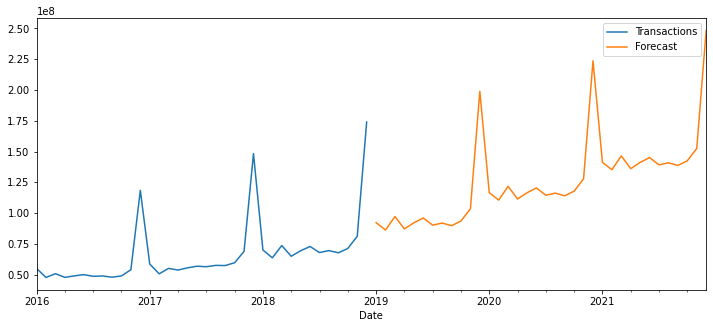

In [9]:
# Forecast for the next 3 years 
forecast = result.predict(start = len(ts),  
                          end = (len(ts)-1) + 3 * 12,  
                          typ = 'levels').rename('Forecast') 
  
# Plot the forecast values 
ts['Transactions'].plot(figsize = (12, 5), legend = True) 
forecast.plot(legend = True)

print(forecast)